In [3]:
import re
from difflib import SequenceMatcher

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix 
#scipy contains modules for linear algebra image processing signal
from sklearn.neighbors import NearestNeighbors
# module that imports k-nearest neighbor learning algorithm
# scipy already imported along with sklearn

import movies.csv and drop the genres column

In [4]:
# data set grouplens.org/movieLens/
# movies has the id, name and genre of the movie
# file_ratings contains movie id and the rating
# both are csv files
# id acts as a link
# we will use the csv function for reading files, this function
# takes as an argument the location iof the file
# since we unzipped both in the home folder we will only write the relative path of the folder
movies = pd.read_csv('data/movies.csv')
# now we shall discard the genre column(as we are using cf)
# as opposed to item based filtering or content based filtering
# using the drop option
movies = movies.drop(['genres'],axis='columns')
# instead of string colums you can also put integer 1
# deleting the entire column
# to delete along the column axis and by-name

import ratings.csv and drop the timestamp column


In [5]:
ratings= pd.read_csv('data/ratings.csv')
# timestamp is also irrelevant
ratings= ratings.drop(['timestamp'],axis='columns')


visualizing the data


In [6]:
ratings.head()
# displays the 1st 5 movie ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [7]:
# to check for unique ratings, also bringing them in a sorted order
# we are looking only at the rating column
# unique is a fn eliminates all the repeated values
ratings['rating'].sort_values().unique()

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

Number of movies

In [8]:
movies.values.shape[0]

9742

Total number of ratings

In [9]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


In [10]:
# values fn puts up everything in the form of tuples
ratings.values

array([[1.00000e+00, 1.00000e+00, 4.00000e+00],
       [1.00000e+00, 3.00000e+00, 4.00000e+00],
       [1.00000e+00, 6.00000e+00, 4.00000e+00],
       ...,
       [6.10000e+02, 1.68250e+05, 5.00000e+00],
       [6.10000e+02, 1.68252e+05, 5.00000e+00],
       [6.10000e+02, 1.70875e+05, 3.00000e+00]])

In [11]:
ratings.values.shape[0]

100836

Number of unique users
ratings['userId']

In [12]:
# nunique will show all the data values
# nunique() will return the number of unique columns


ratings['userId'].nunique()


610

Data processing visualization

long tail property, where some of the entities are given much more priority than some other datapoints 

Hence we shall apply this property on our long tail distribution



In [13]:
# 1 st we shall decide the threshold, as in min. how many times should
# have the movie been rated

popular_movies_thresh = 25
active_users_thresh = 100


Visualize the long tail property of popular movies

movieId
356       329
318       317
296       307
593       279
2571      278
260       251
480       238
110       237
589       224
527       220
2959      218
1         215
1196      211
50        204
2858      204
47        203
780       202
150       201
1198      200
4993      198
1210      196
858       192
457       190
592       189
2028      188
5952      188
7153      185
588       183
608       181
2762      179
         ... 
4093        1
57637       1
56022       1
56060       1
4089        1
56169       1
56274       1
4083        1
4078        1
4074        1
56333       1
56389       1
4065        1
4064        1
56620       1
56837       1
56869       1
56908       1
4051        1
56915       1
4046        1
57147       1
57326       1
57421       1
57499       1
57502       1
57522       1
57526       1
4032        1
193609      1
Name: count, Length: 9724, dtype: int64

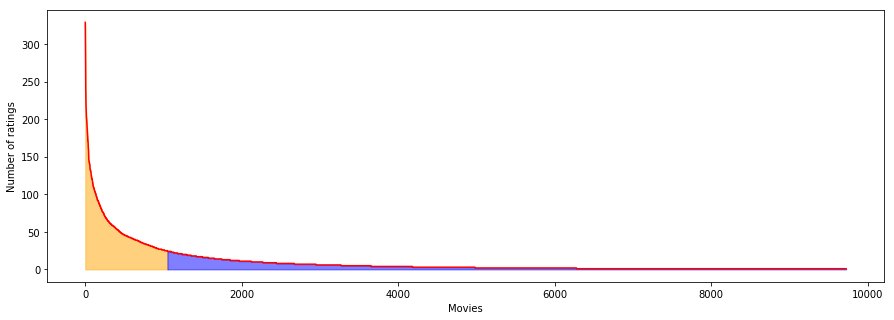

In [14]:
# we have to form a dataframe such that the most popular movies are in the starting of the df and so on
# to do this we use the fn group by- returns the group object and then we use the size fn to find out the no. of occurences
movies_count = pd.DataFrame(ratings.groupby('movieId').size().sort_values(ascending=False),columns=['count'])
# size fn computes the no. of occurences of each movie id 
movies_count
# the parameter columns is just taking the title of the column
# we display the movies_count -data frame and
# now we set a divider so that, which is required for our long tail distribution
divider= len(movies_count.query('count >= @popular_movies_thresh'))
# plotting 
# @popular_movies_thresh'has been defined earlier
# query fn takes the query in the forrm of a string
fig, (ax)= plt.subplots(1,1,figsize=(15,5))
# since it is already i descendinng order
# we just require the ycordinates of our function

plt.plot(np.arange(len(movies_count)),movies_count['count'],color='red')
plt.xlabel('Movies')
plt.ylabel('Number of ratings')

# :divider means that our filtering is done until the divider function
# the first zero means the x-axis
# axes object- parameters the xcords to highlight b/w or the ycords to highlight b/w

ax.fill_between(np.arange(0,divider),0,movies_count['count'][:divider],color ='orange',alpha=0.5)
# alpha decides the transperancy 
# similarly highlight other values of the df
ax.fill_between(np.arange(divider,len(movies_count)),0,movies_count['count'][divider:],color ='blue',alpha=0.5)
#movies_count['count'][:divider]
movies_count['count']


Remove the unpopular movies
this is the preprocessing
the not-so-popular movies create noise in the dataset


In [15]:
popular_movies_indices = movies_count.query('count>=@popular_movies_thresh').index
#popular_movies_indices
#ratings['movieId']
ratings['movieId'].isin(popular_movies_indices)
popular_ratings = ratings[ratings['movieId'].isin(popular_movies_indices)]
#popular_ratings

In [16]:
ratings#.shape[0]


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


In [17]:
popular_ratings.shape

(62518, 3)

In [18]:
# we can see the no. of movies has decreased
popular_ratings.shape[0]

62518

In [19]:
# to find out the number of unique movies
ratings.groupby('movieId').count().shape[0]


9724

In [20]:
popular_ratings.groupby('movieId').count().shape[0]
popular_ratings
# no. of unique movie ids after we have got all the popular ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
7,1,110,4.0
8,1,151,5.0
10,1,163,5.0
11,1,216,5.0


The same long tail distribution is also done for the number of users.
Not all users are active and a similar dataframe is applied for users


userId
414    944
599    818
68     773
474    644
274    639
448    620
480    554
380    553
608    539
288    519
590    517
483    497
177    492
249    485
307    479
182    478
610    467
298    446
489    442
600    435
64     431
387    419
606    415
305    397
219    396
477    388
91     381
232    380
561    377
438    370
      ... 
572    117
256    116
233    116
393    113
95     113
559    113
367    112
80     112
605    111
542    110
524    109
527    108
308    108
137    108
466    108
587    106
602    105
100    105
287    105
424    105
314    104
419    104
301    103
254    103
551    103
76     102
464    102
286    102
22     101
216    100
Name: count, Length: 188, dtype: int64

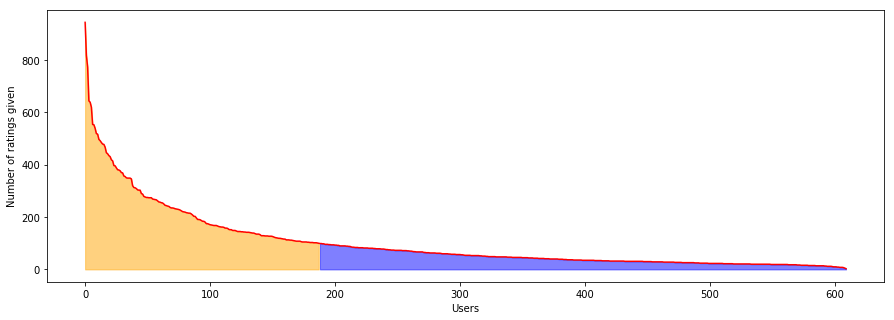

In [21]:
# majority of the users are not that active
# we have again used the ratings dataframe object
# here also we shall label it as count
users_count = pd.DataFrame(popular_ratings.groupby('userId').size().sort_values(ascending=False),columns=['count'])
#query to be done in the form of a string
divider = len(users_count.query('count>=@active_users_thresh'))

fig, (ax)= plt.subplots(1,1,figsize=(15,5))
plt.plot(np.arange(len(users_count)),users_count['count'],color='r')
plt.xlabel('Users')
plt.ylabel('Number of ratings given')
# if you will pass only one arg it will consider it as starting from 0
ax.fill_between(np.arange(divider),0,users_count['count'][:divider],color='orange',alpha=0.5)
ax.fill_between(np.arange(divider,len(users_count)),
                0,users_count['count'][divider:],
                color='blue',alpha=0.5)
# since we have sorted users_count in descending order 
# after the divider everything will be less than 100
users_count['count'][:divider]
# divider= 188 
#divider



In [22]:
active_users_indices = users_count.query('count>=@active_users_thresh').index
active_users_indices
popular_ratings['userId']
popular_ratings['userId'].isin(active_users_indices)
#popular_ratings['userId'].isin(active_users_indices)
active_users_ratings = popular_ratings[popular_ratings['userId'].isin(active_users_indices)]

In [23]:
popular_ratings.shape[0]

62518

In [24]:
# number of rows in ratings data after removing unpopular movies and inactive users
active_users_ratings.shape[0]

44588

In [25]:
active_users_ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
7,1,110,4.0
8,1,151,5.0
10,1,163,5.0
11,1,216,5.0


In [26]:
popular_ratings.groupby('userId').count().shape[0]

610

In [27]:
# we obtained  divider earlier which was 188
active_users_ratings.groupby('userId').count().shape[0]


188

Creating a pivot table with rows containing movieid and columns containing userId. The cells in the table will only contain the rating given by thr user to the movie


In [28]:
# pivot data frame fn from pandas libraries
# fillna, returns the table with all the empty entries filled with a 0
pivot_table = active_users_ratings.pivot(index='movieId',columns='userId',values='rating').fillna(0)

In [29]:
pivot_table.index.shape[0]

1050

In [30]:
pivot_table.columns.shape[0]

188

In [31]:
pivot_table.head()


userId,1,4,6,7,15,18,19,20,21,22,...,597,599,600,602,603,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,2.5,3.5,4.0,0.0,3.5,0.0,...,4.0,3.0,2.5,0.0,4.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,3.0,3.0,3.0,3.5,0.0,...,0.0,2.5,4.0,4.0,0.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,3.0,4.5,0.0,3.0,4.0,0.0,0.0,0.0,0.0,5.0


To apply knearest neighbours, we need to create a sparse matrix out of this function, we need to compress this matrix


In [32]:
sparse_matrix = csr_matrix(pivot_table.values)
pivot_table.values
sparse_matrix
# this is the parameter to knn

<1050x188 sparse matrix of type '<class 'numpy.float64'>'
	with 44588 stored elements in Compressed Sparse Row format>

# create dictionaries, mapping for

1.movie title to movie id

2.movie id to movie title 

In [33]:

pivot_table_movies = movies.set_index('movieId').loc[pivot_table.index]['title'].values
pivot_table_movies
#movies
pivot_table.index
pivot_table.head()
# mapping from title to id

title_to_id = {movie:i for i,movie in enumerate(pivot_table_movies)}
# these are only the popular movies
#title_to_id

In [34]:
id_to_title ={v:k for k,v in title_to_id.items()}

In [35]:
# training the knn model using sparse data step

In [36]:
# the similarity can be of any form here we are using cosine similarity
# function- here we have used cosine metric

# why cosine? sparse a lot of dimensions
# cosine similarity b/w 2 non-zero vectors of an inner product space that measures 
# the cosine of the angle b/w the 2 feature vectors, euclid not suitable
# hence euclidian distance is not used
model_knn = NearestNeighbors(metric = 'cosine',algorithm ='brute')
# fits the model hence computing distance becomes easier
model_knn.fit(sparse_matrix)
#model_knn
# data is very sparse- we dont have a lot of data

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [37]:
# use seq matcher and then choose the 1st 10
# recommend one with a particular keyword

# isjunk discards some set of sequences automatically
# ratio returned by sequence matcher
# searching for movie titles when given a keyword

In [38]:
# one mapping and other the seq we are looking for
def find_matches(title_to_id,movie_title):
    # seperating the key-value pair from the data frame
    movie_ids= np.array(list(title_to_id.values())).astype(int)
    titles= np.array(list(title_to_id.keys()))
    ratios = list()
    for title, movie_id in title_to_id.items():
        #first part creates a seq-matcher object,and then use ratio() function of the object
        ratio= SequenceMatcher(None,movie_title,title,autojunk=False).ratio()
        ratios.append(ratio)
        # this will store the last 10 ex
    titles, ids = titles[np.argsort(ratios)][-10:], movie_ids[np.argsort(ratios)][-10:]
    # we need to reverse this as the highest one is in the end
    # zip stores the pair, now the 1st pair is the one which mathces the most
    return list(reversed(list(zip(titles,ids))))

In [42]:
title ='story'
options = find_matches(title_to_id, title)
# the widgets here are only to check 
# this options list already has the set of options to be considered
import ipywidgets as widgets
drop = widgets.Dropdown(options=options)
drop

Dropdown(options=(('Toy Story (1995)', 0), ('West Side Story (1961)', 409), ('Get Shorty (1995)', 11), ('Glory…

In [40]:
movie_id = drop.value
# we selected a word for which we want recommend
# reshape such that it contains only one row
# -1 will be computed automatically

test = pivot_table.iloc[movie_id,:].values.reshape(1,-1)

distances, indices = model_knn.kneighbors(test,n_neighbors=10+1)
# returns distances and indices as 2 lists
# distances are lowest to highest
# hence the best movie is on the top
indices  = indices.squeeze()[1:]

print('Recommendations for:', id_to_title[movie_id])
for i, index in enumerate(indices):
    print(i+1,'.',id_to_title[index])
    

Recommendations for: Toy Story (1995)
1 . Jurassic Park (1993)
2 . Star Wars: Episode IV - A New Hope (1977)
3 . Star Wars: Episode V - The Empire Strikes Back (1980)
4 . Star Wars: Episode VI - Return of the Jedi (1983)
5 . Forrest Gump (1994)
6 . Shrek (2001)
7 . Back to the Future (1985)
8 . Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
9 . Groundhog Day (1993)
10 . Toy Story 2 (1999)
